In [1]:

import numpy as np
import matplotlib.pyplot as plt

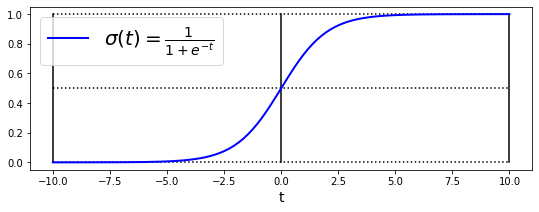

In [2]:

#Logistic Function
t = np.linspace(-10, 10, 200)
sigma = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10,10], [0,0], "k:")
plt.plot([-10,10], [0.5,0.5], "k:")
plt.plot([-10,10], [1,1], "k:")

plt.plot([0,0], [0,1], "k-")
plt.plot([-10,-10], [0,1], "k-")
plt.plot([10,10], [0,1], "k-")
plt.xlabel("t", fontsize=14)

plt.plot(t, sigma, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1+e^{-t}}$")
plt.legend(loc="upper left", fontsize=20)

In [41]:
from sklearn import datasets 
#Load the dataset
iris = datasets.load_iris()
list(iris.keys())
#Take only the data that we need
X = iris["data"][:,3] #Only the 3rd feature (petal width)
y = (iris["target"] == 2 ).astype(np.int) # 1 if Iris Virginica, else 0


(150, 1)

In [42]:
#Let's train the logistic model 
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X.reshape(-1,1), y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

(0.0, 3.0, -0.02, 1.02)

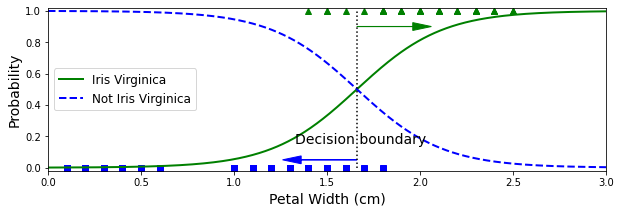

In [120]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = logistic_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] #the [0] takes the very first value where the y_proba is 0.5 or greater 

plt.figure(figsize=(10,3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_proba[:,1], "g-", linewidth=2, label="Iris Virginica")
plt.plot(X_new, y_proba[:,0], "b--",  linewidth=2, label="Not Iris Virginica")
plt.plot([decision_boundary,decision_boundary], [0,1.0], "k:")


plt.text(decision_boundary+0.02, 0.15,"Decision boundary", ha="center", color= "k", fontsize=14)
plt.arrow(decision_boundary, 0.05, -0.3,0, head_width=0.05,  head_length=0.1, fc="b", ec="b")
plt.arrow(decision_boundary, 0.9, 0.3,0, head_width=0.05, head_length=0.1,fc="g", ec="g")


plt.ylabel("Probability", fontsize=14)
plt.xlabel("Petal Width (cm)", fontsize=14)
plt.legend(loc="center left", fontsize=12)
plt.axis([0.0, 3.0, -0.02,1.02])